In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR

ImportError: cannot import name 'mean_absolut_error' from 'sklearn.metrics' (C:\Users\Anton\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [7]:
main_df = pd.read_csv('final.csv', sep=',', index_col=0 )

In [8]:
main_df.shape

(91, 172802)

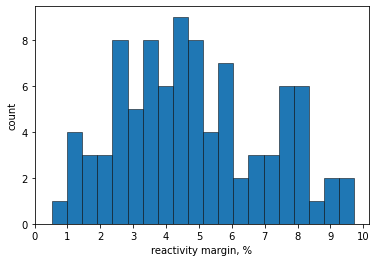

In [9]:
plt.hist(main_df.reactivity_margin, bins=20, linewidth=0.5, edgecolor="black")
plt.xlabel('reactivity margin, %')
plt.ylabel('count')
plt.xticks(list(range(11)))
plt.show()

In [10]:
main_df.drop(columns=['Keff'], inplace=True)
target = main_df.pop('reactivity_margin')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(main_df, target, test_size=0.3, random_state=7)

In [44]:
X_train.shape, X_test.shape

((77, 172800), (14, 172800))

## Sklearn модели

In [65]:
lr = LinearRegression(n_jobs=-1)

sgd = SGDRegressor()

sgd_params = {
    'penalty':['l2', 'elasticnet'],
    'alpha':[0.0001, 0.001, 0.005],
    'l1_ratio':[0.15, 0.25, 0.5, 0.65, 0.75],
    'fit_intercept':[True],
    'tol':[0.0005],
    'max_iter':[50000]
}

svr = LinearSVR()
             
svr_params = {
    'tol':[0.0005],
    'C':[0.1, 0.5, 1, 10],
    'max_iter':[50000]
}


In [66]:
sss = KFold(n_splits=3, shuffle=True, random_state=7)

In [33]:
lr.fit(X_train, y_train)

sgd_search = HalvingGridSearchCV(estimator=sgd, 
                                 param_grid=sgd_params,
                                 scoring='r2',
                                 cv=sss, 
                                 random_state=7).fit(X_train, y_train)

svr_search = HalvingGridSearchCV(estimator=svr, 
                                 param_grid=svr_params,
                                 scoring='r2',
                                 cv=sss, 
                                 random_state=7).fit(X_train, y_train)

In [35]:
lr.predict(X_test)

array([ 8.13298208e+00,  2.92723072e+01,  3.25732094e+00,  4.34013207e+02,
       -1.21193016e+02,  8.13298208e+00,  3.06630256e+02,  2.79389280e+01,
       -1.96779865e+02,  3.06630256e+02, -1.85446788e+02, -6.69256372e+01,
       -9.54112661e+02, -3.45751647e+02,  9.50836701e+00,  1.95141569e+02,
       -4.39386321e+01, -9.19462312e+01,  8.00790799e+00,  2.65836141e+02,
       -1.55203720e+02,  4.93935062e+00,  1.40327629e+02, -1.67891016e+02,
        1.09479291e+02,  8.76664186e+03, -2.11640323e+02,  7.29291336e+02])

In [39]:
mean_absolute_error(y_test, sgd_search.predict(X_test))

1.8312279414821295

In [40]:
mean_absolute_error(y_test, svr_search.predict(X_test))

1.96759557273474

In [53]:
main_df_after_correct = pd.read_csv('final_with_ampules.csv', sep=',', index_col=0 )

In [58]:
# main_df_after_correct.drop(columns=['Keff'], inplace=True)
target2 = main_df_after_correct.pop('reactivity_margin')

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(main_df_after_correct, target2, test_size=0.2, random_state=7)

In [67]:
%time
lr.fit(X_train2, y_train2)

sgd_search = HalvingGridSearchCV(estimator=sgd, 
                                 param_grid=sgd_params,
                                 scoring='r2',
                                 cv=sss, 
                                 random_state=7).fit(X_train2, y_train2)

svr_search = HalvingGridSearchCV(estimator=svr, 
                                 param_grid=svr_params,
                                 scoring='r2',
                                 cv=sss, 
                                 random_state=7).fit(X_train2, y_train2)

Wall time: 0 ns


In [70]:
lr.predict(X_test2)

array([-3.48529578e+04, -5.54189442e+07,  8.13017797e+00, -2.60125287e+03,
       -3.26951481e+04, -1.34004081e+03, -1.54897989e+03, -3.84207837e+03,
       -3.81221685e+03,  3.77835216e+01,  8.13017797e+00,  4.57487851e+00,
        4.03680461e+03,  3.57071754e+02,  1.89780259e+03, -1.13154983e+04,
        8.00544244e+00,  7.16685123e+03])

In [71]:
sgd_search.predict(X_test2)

array([4.92179953, 4.3633907 , 4.95251291, 4.94539647, 4.92425993,
       4.92725771, 4.90541383, 4.33316432, 4.92442832, 4.94151201,
       4.95251291, 4.91268876, 4.38051127, 4.89123058, 4.36246312,
       4.35196069, 4.97434377, 4.94496619])

In [72]:
svr_search.predict(X_test2)

array([4.62278771, 3.93751232, 4.6566249 , 4.64604106, 4.62550208,
       4.62626373, 4.60470844, 3.89178168, 4.63762693, 4.65669355,
       4.6566249 , 4.55134235, 3.98117343, 4.53976095, 3.9616542 ,
       3.94917924, 4.70611177, 4.64836567])

In [74]:
mean_absolute_error(y_test2, sgd_search.predict(X_test2))

1.801135559719649